In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.axes as ax

In [14]:
data=pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [16]:
data.dropna(inplace=True)

In [17]:
data.shape

(699, 2)

<AxesSubplot:xlabel='x', ylabel='y'>

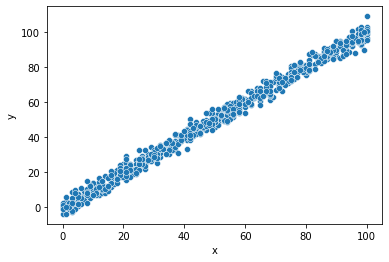

In [15]:
sns.scatterplot(x=data['x'],y=data['y'])

In [18]:
train_input=np.array(data['x'][:500]).reshape(-1,1)
train_output=np.array(data['y'][:500]).reshape(-1,1)
val_input=np.array(data['x'][500:]).reshape(-1,1)
val_output=np.array(data['y'][500:]).reshape(-1,1)

In [20]:
print(train_input.shape,train_output.shape)
print(val_input.shape,val_output.shape)

(500, 1) (500, 1)
(199, 1) (199, 1)


In [21]:
def forward_propogation(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    predictions=np.multiply(m,train_input)+c
    return predictions

In [22]:
def cost_function(predictions,train_output):
    cost=np.mean((train_output-predictions)**2)*0.5
    return cost   

df=(f(x)-y)/n
dm=df*x
dc=df*1

In [23]:
def back_prop(train_input,train_output,predictions):
    derivatives=dict()
    df=predictions-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    return derivatives

In [24]:
def update_params(parameters,learning_rate,derivatives):
    parameters["m"]=parameters["m"]-learning_rate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate*derivatives["dc"]
    return parameters

In [32]:
def train(train_input,train_output,learning_rate,iters):
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters['c']=np.random.uniform(0,1)
    plt.figure()
    #loss
    loss=list()
    
    for i in range(iters):
        predictions=forward_propogation(train_input,parameters)
        
        cost=cost_function(predictions,train_output)
        loss.append(cost)
        print(f"Iteration= {i+1}, Loss= {cost}")
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,predictions,"+",label="Training")
        legend=ax.legend()
        plt.show()
        
        
        
        derivatives=back_prop(train_input,train_output,predictions)
        
        parameters=update_params(parameters,learning_rate,derivatives)
    
    return parameters,loss

Iteration= 1, Loss= 710.2670889531083


<Figure size 432x288 with 0 Axes>

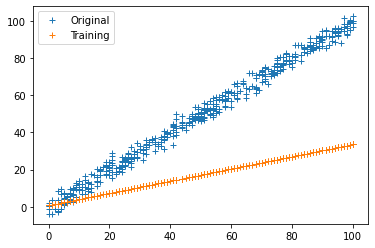

Iteration= 2, Loss= 324.450184187602


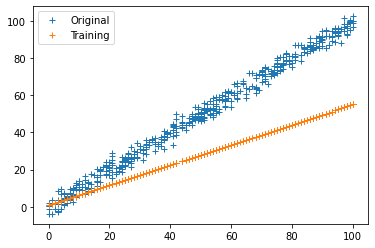

Iteration= 3, Loss= 149.40462387483865


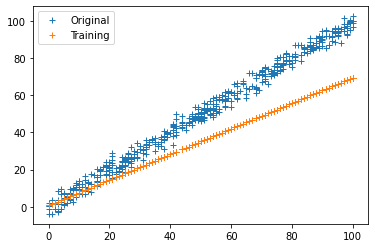

Iteration= 4, Loss= 69.98625599947744


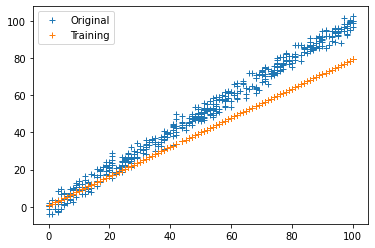

Iteration= 5, Loss= 33.95405125375009


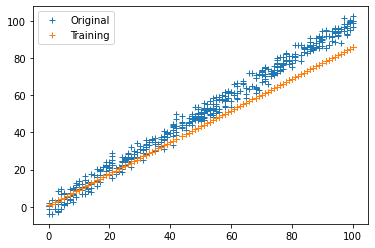

Iteration= 6, Loss= 17.606196776404886


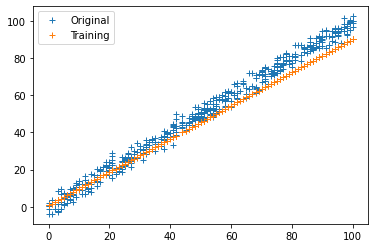

Iteration= 7, Loss= 10.189153819187208


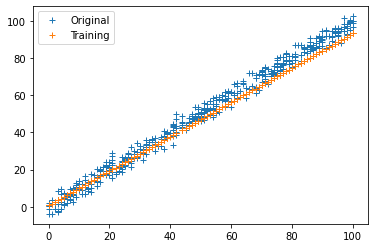

Iteration= 8, Loss= 6.824029940951173


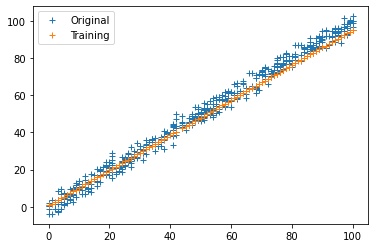

Iteration= 9, Loss= 5.297266237086571


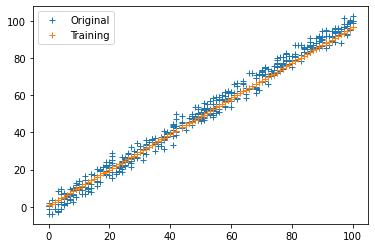

Iteration= 10, Loss= 4.6045685807426375


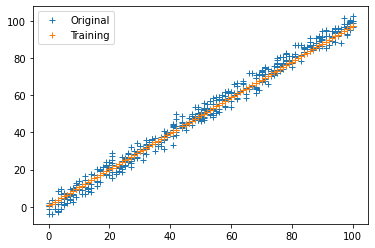

Iteration= 11, Loss= 4.290287614169629


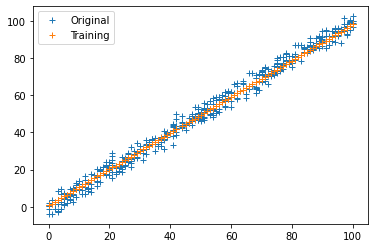

Iteration= 12, Loss= 4.147694719060463


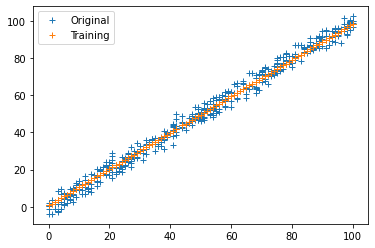

Iteration= 13, Loss= 4.082996892308072


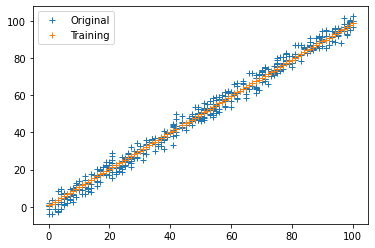

Iteration= 14, Loss= 4.053640144513771


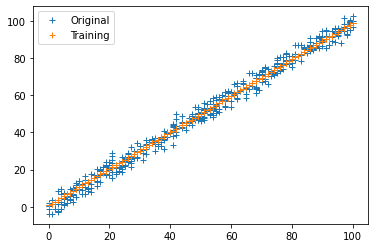

Iteration= 15, Loss= 4.040317683552823


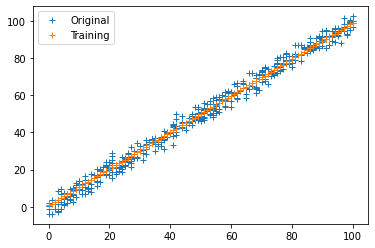

Iteration= 16, Loss= 4.034269996453222


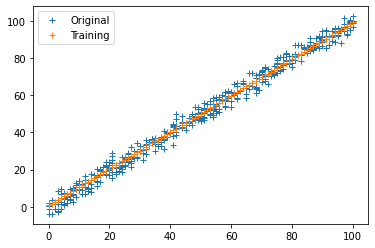

Iteration= 17, Loss= 4.031522882477166


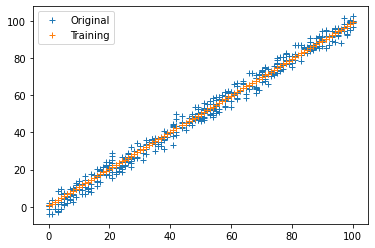

Iteration= 18, Loss= 4.030273242347917


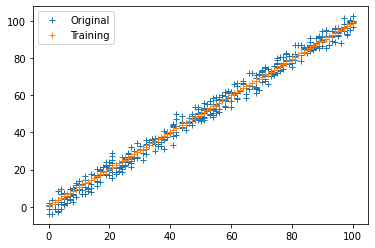

Iteration= 19, Loss= 4.029703007926422


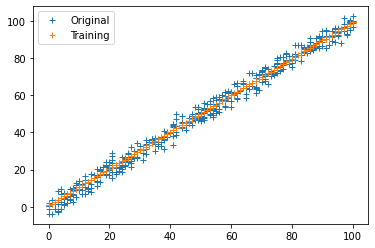

Iteration= 20, Loss= 4.02944102079186


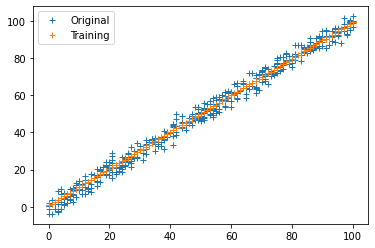

In [33]:
parameters,loss=train(train_input,train_output,0.0001,20)

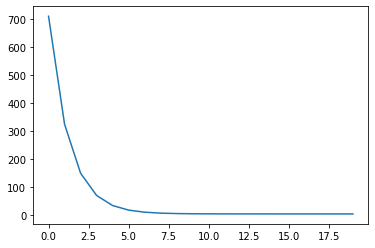

In [34]:
plt.plot(loss)

In [35]:
print(parameters)

{'m': 0.9860479584885661, 'c': 0.735363606625606}


In [36]:
test_predictions=val_input*parameters['m']+parameters['c']

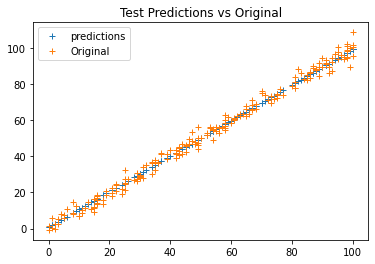

In [39]:
plt.plot(val_input,test_predictions,'+',label='predictions')
plt.plot(val_input,val_output,'+',label='Original')
plt.legend()
plt.title("Test Predictions vs Original")
plt.show()

In [40]:
loss_test=cost_function(test_predictions,val_output)
print(f"Test Loss= {loss_test}")

Test Loss= 4.029872543874172
